In [1]:
from math import *

import numpy as np

import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.io import fits
import astropy.coordinates as coords
import astropy.units as u

In [2]:
brick1 = Table.read('https://portal.nersc.gov/project/cosmo/data/legacysurvey/dr8/north/tractor/250/tractor-2503p362.fits', hdu=1)

In [3]:
star = brick1[(brick1["gaia_pointsource"]) & (brick1['flux_g'] > 0) & (brick1['flux_r'] > 0)]

In [4]:
star

release,brickid,brickname,objid,brick_primary,brightblob,maskbits,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq [5],ebv,mjd_min,mjd_max,ref_cat,ref_id,pmra,pmdec,parallax,pmra_ivar,pmdec_ivar,parallax_ivar,ref_epoch,gaia_pointsource,gaia_phot_g_mean_mag,gaia_phot_g_mean_flux_over_error,gaia_phot_g_n_obs,gaia_phot_bp_mean_mag,gaia_phot_bp_mean_flux_over_error,gaia_phot_bp_n_obs,gaia_phot_rp_mean_mag,gaia_phot_rp_mean_flux_over_error,gaia_phot_rp_n_obs,gaia_phot_variable_flag,gaia_astrometric_excess_noise,gaia_astrometric_excess_noise_sig,gaia_astrometric_n_obs_al,gaia_astrometric_n_good_obs_al,gaia_astrometric_weight_al,gaia_duplicated_source,gaia_a_g_val,gaia_e_bp_min_rp_val,gaia_phot_bp_rp_excess_factor,gaia_astrometric_sigma5d_max,gaia_astrometric_params_solved,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,fiberflux_g,fiberflux_r,fiberflux_z,fibertotflux_g,fibertotflux_r,fibertotflux_z,apflux_g [8],apflux_r [8],apflux_z [8],apflux_resid_g [8],apflux_resid_r [8],apflux_resid_z [8],apflux_ivar_g [8],apflux_ivar_r [8],apflux_ivar_z [8],mw_transmission_g,mw_transmission_r,mw_transmission_z,mw_transmission_w1,mw_transmission_w2,mw_transmission_w3,mw_transmission_w4,nobs_g,nobs_r,nobs_z,nobs_w1,nobs_w2,nobs_w3,nobs_w4,rchisq_g,rchisq_r,rchisq_z,rchisq_w1,rchisq_w2,rchisq_w3,rchisq_w4,fracflux_g,fracflux_r,fracflux_z,fracflux_w1,fracflux_w2,fracflux_w3,fracflux_w4,fracmasked_g,fracmasked_r,fracmasked_z,fracin_g,fracin_r,fracin_z,anymask_g,anymask_r,anymask_z,allmask_g,allmask_r,allmask_z,wisemask_w1,wisemask_w2,psfsize_g,psfsize_r,psfsize_z,psfdepth_g,psfdepth_r,psfdepth_z,galdepth_g,galdepth_r,galdepth_z,psfdepth_w1,psfdepth_w2,psfdepth_w3,psfdepth_w4,wise_coadd_id,lc_flux_w1 [11],lc_flux_w2 [11],lc_flux_ivar_w1 [11],lc_flux_ivar_w2 [11],lc_nobs_w1 [11],lc_nobs_w2 [11],lc_fracflux_w1 [11],lc_fracflux_w2 [11],lc_rchisq_w1 [11],lc_rchisq_w2 [11],lc_mjd_w1 [11],lc_mjd_w2 [11],fracdev,fracdev_ivar,shapeexp_r,shapeexp_r_ivar,shapeexp_e1,shapeexp_e1_ivar,shapeexp_e2,shapeexp_e2_ivar,shapedev_r,shapedev_r_ivar,shapedev_e1,shapedev_e1_ivar,shapedev_e2,shapedev_e2_ivar
,,,,,,,,deg,deg,1/deg^2,1/deg^2,pix,pix,,mag,,,,,mas / yr,mas / yr,mas,1/(mas/yr)^2,1/(mas/yr)^2,1/mas^2,yr,,mag,,,mag,,,mag,,,,,,,,,,,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,arcsec,1/arcsec^2,,,,,arcsec,1/arcsec^2,,,,
int16,int32,bytes8,int32,bool,int16,int16,bytes4,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,int16,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,int16,i

In [5]:
m13 = coords.SkyCoord.from_name ('M 13')
star_coords = coords.SkyCoord (star["ra"], star["dec"], unit = 'deg', frame = 'icrs')

In [6]:
sep_m13 = star_coords.separation(m13).arcmin
donut = (sep_m13 > 5) & (sep_m13 < 7)

(250.17269986845423, 250.54405155410652, 36.09148697736994, 36.48346962660515)

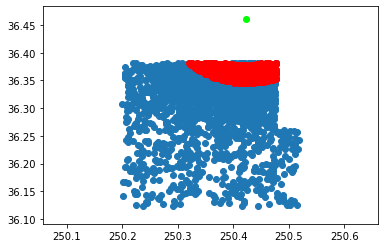

In [7]:
plt.scatter(star["ra"], star["dec"])
plt.scatter(star["ra"][donut], star["dec"][donut], c = "r")
plt.scatter(m13.ra.deg, m13.dec.deg, c = "lime")
plt.axis("equal")

In [8]:
indonut = star[donut]
indonut

release,brickid,brickname,objid,brick_primary,brightblob,maskbits,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq [5],ebv,mjd_min,mjd_max,ref_cat,ref_id,pmra,pmdec,parallax,pmra_ivar,pmdec_ivar,parallax_ivar,ref_epoch,gaia_pointsource,gaia_phot_g_mean_mag,gaia_phot_g_mean_flux_over_error,gaia_phot_g_n_obs,gaia_phot_bp_mean_mag,gaia_phot_bp_mean_flux_over_error,gaia_phot_bp_n_obs,gaia_phot_rp_mean_mag,gaia_phot_rp_mean_flux_over_error,gaia_phot_rp_n_obs,gaia_phot_variable_flag,gaia_astrometric_excess_noise,gaia_astrometric_excess_noise_sig,gaia_astrometric_n_obs_al,gaia_astrometric_n_good_obs_al,gaia_astrometric_weight_al,gaia_duplicated_source,gaia_a_g_val,gaia_e_bp_min_rp_val,gaia_phot_bp_rp_excess_factor,gaia_astrometric_sigma5d_max,gaia_astrometric_params_solved,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,fiberflux_g,fiberflux_r,fiberflux_z,fibertotflux_g,fibertotflux_r,fibertotflux_z,apflux_g [8],apflux_r [8],apflux_z [8],apflux_resid_g [8],apflux_resid_r [8],apflux_resid_z [8],apflux_ivar_g [8],apflux_ivar_r [8],apflux_ivar_z [8],mw_transmission_g,mw_transmission_r,mw_transmission_z,mw_transmission_w1,mw_transmission_w2,mw_transmission_w3,mw_transmission_w4,nobs_g,nobs_r,nobs_z,nobs_w1,nobs_w2,nobs_w3,nobs_w4,rchisq_g,rchisq_r,rchisq_z,rchisq_w1,rchisq_w2,rchisq_w3,rchisq_w4,fracflux_g,fracflux_r,fracflux_z,fracflux_w1,fracflux_w2,fracflux_w3,fracflux_w4,fracmasked_g,fracmasked_r,fracmasked_z,fracin_g,fracin_r,fracin_z,anymask_g,anymask_r,anymask_z,allmask_g,allmask_r,allmask_z,wisemask_w1,wisemask_w2,psfsize_g,psfsize_r,psfsize_z,psfdepth_g,psfdepth_r,psfdepth_z,galdepth_g,galdepth_r,galdepth_z,psfdepth_w1,psfdepth_w2,psfdepth_w3,psfdepth_w4,wise_coadd_id,lc_flux_w1 [11],lc_flux_w2 [11],lc_flux_ivar_w1 [11],lc_flux_ivar_w2 [11],lc_nobs_w1 [11],lc_nobs_w2 [11],lc_fracflux_w1 [11],lc_fracflux_w2 [11],lc_rchisq_w1 [11],lc_rchisq_w2 [11],lc_mjd_w1 [11],lc_mjd_w2 [11],fracdev,fracdev_ivar,shapeexp_r,shapeexp_r_ivar,shapeexp_e1,shapeexp_e1_ivar,shapeexp_e2,shapeexp_e2_ivar,shapedev_r,shapedev_r_ivar,shapedev_e1,shapedev_e1_ivar,shapedev_e2,shapedev_e2_ivar
,,,,,,,,deg,deg,1/deg^2,1/deg^2,pix,pix,,mag,,,,,mas / yr,mas / yr,mas,1/(mas/yr)^2,1/(mas/yr)^2,1/mas^2,yr,,mag,,,mag,,,mag,,,,,,,,,,,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,arcsec,1/arcsec^2,,,,,arcsec,1/arcsec^2,,,,
int16,int32,bytes8,int32,bool,int16,int16,bytes4,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,int16,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,int16,i

In [9]:
mag_g = 22.5 - 2.5 * np.log10(indonut['flux_g'])
mag_r = 22.5 - 2.5 * np.log10(indonut['flux_r'])

In [10]:
x = mag_g - mag_r
y = mag_g - 5 * log10(8300) + 5

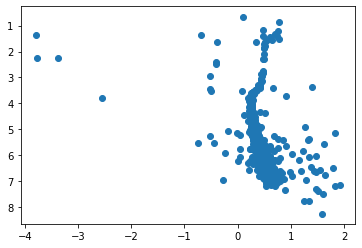

In [11]:
plt.gca().invert_yaxis()
plt.scatter(x,y)

(-1, 2)

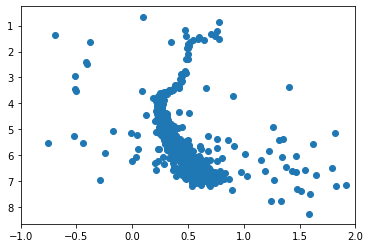

In [12]:
plt.gca().invert_yaxis()
plt.scatter(x,y)
plt.xlim(-1,2)